# Data Pre-processing before Graphical Network Analysis

Last Update: July 24th, 2020

### Before You Start

In this notebook, we will prepare the dataset for our graphical network analysis example.

We can retrieve the daily stock returns data for the specified firms (and S&P 500 return data) from CRSP via WRDS. 
- Note that the databases in the Monthly Update Section of CRSP are updated around the 12th business day of each month; 
    - That is, prior to July 16th, 2020 (and after July 1st, 2020), the maximum allow date for the CRSP Daily Stock date range is May 31st, 2020 rather than June 30th, 2020. 
    - It is possible that the databases are not yet updated even after the 12th business day. One should wait patiently for the database to update.

In addition, we will also clean the 3-Month T-Bill return, which is retrieve from FRED. 

Please note that this notebook is designated specifically for the datasets downloaded from the specified sources. Using datasets from other sources may result in errors thereafter.

## 0. Set Up Environment

In [1]:
## Import the various modules
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Read and Edit Data from CRSP

Load the basic information from an excel file, named "dataset_summary", where we have mannually entered the ticker, firm name, sector, and PERMNO information for each firm.

In [2]:
## Read Summary Information for the CRSP data
file_name = 'dataset_summary.xlsx'
sheet_name = 'CRSP'
firms_CRSP = pd.read_excel(file_name, sheet_name)
firms_CRSP

,Ticker,Name,Sector,PERMNO
0,FRC,First Republic,Bank,12448
1,PNC,PNC Financial,Bank,60442
2,USB,US Bancorp,Bank,66157
3,JPM,JPMorgan Chase,Bank,47896
4,BAC,Bank of America,Bank,59408
5,C,Citigroup,Bank,70519
6,RY,Royal Bank of Canada,Bank,82654
7,WFC,Wells Fargo,Bank,38703
8,GS,Goldman Sachs,Bank,86868
9,MS,Morgan Stanley,Bank,69032


Load the daily dataset file, which is downloaded from CRSP via WRDS. It contains return information for the specified firms above.

In [3]:
## Read the daily dataset (this dataset file is downloaded from CRSP)
file_name = 'dataset_CRSP_daily.csv'
df = pd.read_csv(file_name,low_memory=False)
df

,PERMNO,date,TICKER,COMNAM,CUSIP,RET
0,10107,1999/12/31,MSFT,MICROSOFT CORP,59491810,-0.007439
1,10107,2000/01/03,MSFT,MICROSOFT CORP,59491810,-0.001606
2,10107,2000/01/04,MSFT,MICROSOFT CORP,59491810,-0.033780
3,10107,2000/01/05,MSFT,MICROSOFT CORP,59491810,0.010544
4,10107,2000/01/06,MSFT,MICROSOFT CORP,59491810,-0.033498
...,...,...,...,...,...,...
104436,90794,2020/06/24,RDS,ROYAL DUTCH SHELL PLC,78025920,-0.049641
104437,90794,2020/06/25,RDS,ROYAL DUTCH SHELL PLC,78025920,0.023249
104438,90794,2020/06/26,RDS,ROYAL DUTCH SHELL PLC,78025920,-0.028917
104439,90794,2020/06/29,RDS,ROYAL DUTCH SHELL PLC,78025920,0.016104


In [4]:
## Check the column names of the dataset
df.columns

Index(['PERMNO', 'date', 'TICKER', 'COMNAM', 'CUSIP', 'RET'], dtype='object')

In [5]:
## Check the unique tickers in the dataset
# Note that there is more tickers than the ones we specified in the summary information
df.TICKER.unique()

array(['MSFT', 'XOM', 'FRC', 'CHV', 'CVX', 'AAPL', 'BABA', 'PFE', 'JNJ',
       'MRK', 'BPA', 'BP', 'WFC', 'CMB', 'JPM', 'BAC', 'PNC', 'USB',
       'MWD', 'MS', 'C', 'RY', 'GS', 'HBC', 'HSBC', 'GOOG', 'GOOGL',
       'RDS'], dtype=object)

Notice that the raw data we downloaded from CRSP has more tickers than what we specified in the data_summary file. So we need to clean up the data and extract only the ones we wanted. 

Also, we will only extract the "RET" column, which records the "Holding Period Return" information. 

Moreover, the data for each firm are stacked together, which is inconvenient for us to use. Thus, we also need to reorganize the data.

In [6]:
## Rearrange the data: separate by the specified tickers and extract "RET" column only
RET_DFS = []
for i in range(len(firms_CRSP.PERMNO)):
    temp = firms_CRSP.PERMNO[i]
    firmTic = firms_CRSP.Ticker[i]
    df_temp = df[df.PERMNO == temp].copy()
    df_temp['date']=pd.to_datetime(df_temp['date'])

    RET_data=pd.DataFrame(columns=['RET'], index=df_temp.date)
    RET_data['RET']=pd.to_numeric(df_temp['RET'].values, errors='coerce')
    RET_DFS.append(RET_data)
    
    # Output the firm (ticker) and its shape
    print(firmTic,':', RET_data.shape)

FRC : (2405, 1)
PNC : (5157, 1)
USB : (5157, 1)
JPM : (5157, 1)
BAC : (5157, 1)
C : (5157, 1)
RY : (5157, 1)
WFC : (5157, 1)
GS : (5157, 1)
MS : (5158, 1)
HSBC : (5157, 1)
JNJ : (5157, 1)
PFE : (5157, 1)
MRK : (5157, 1)
XOM : (5157, 1)
RDS : (3760, 1)
CVS : (5157, 1)
BP : (5157, 1)
AAPL : (5157, 1)
GOOG : (3994, 1)
MSFT : (5157, 1)
BABA : (1455, 1)


In [7]:
## Put the return data together

len_RET_DFS = np.array([len(temp) for temp in RET_DFS])

Names = firms_CRSP.Ticker
data = pd.DataFrame(columns=Names, index=RET_DFS[np.argmax(len_RET_DFS)].index)
for i in range(len(Names)):
    data[Names[i]] = RET_DFS[i]

In [8]:
data

Ticker,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA
date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,-0.005587,0.005277,-0.004804,-0.009864,0.006780,0.001418,-0.004615,0.021695,0.010619,...,-0.007648,-0.009217,0.001554,NaN,0.013158,-0.003151,0.024922,NaN,-0.007439,NaN
2000-01-03,NaN,-0.051966,-0.065617,-0.060338,-0.034869,-0.050505,-0.031161,-0.032457,-0.062376,-0.054291,...,-0.017341,0.006512,-0.029480,NaN,-0.034632,-0.008430,0.088754,NaN,-0.001606,NaN
2000-01-04,NaN,-0.031111,-0.033708,-0.023493,-0.059355,-0.042553,-0.001462,-0.051118,-0.062987,-0.074074,...,-0.037255,-0.037893,-0.017586,NaN,0.000000,-0.005313,-0.084310,NaN,-0.033780,NaN
2000-01-05,NaN,0.004587,-0.002907,-0.006173,0.010974,0.003704,-0.005857,-0.008418,-0.046828,-0.036500,...,0.016293,0.042267,0.054516,NaN,0.017937,0.034188,0.014634,NaN,0.010544,NaN
2000-01-06,NaN,0.047184,0.032070,0.014197,0.071913,0.065191,0.008837,0.044143,0.042789,0.019201,...,0.036072,0.008295,0.049383,NaN,0.042584,0.002066,-0.086538,NaN,-0.033498,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.026556,-0.040379,-0.044819,-0.033391,-0.039532,-0.040415,-0.015222,-0.040764,-0.033011,-0.019628,...,-0.017699,-0.016209,-0.047109,-0.049641,-0.041557,-0.042615,-0.017652,-0.021366,-0.020158,-0.011060
2020-06-25,0.024723,0.029696,0.032004,0.034862,0.038219,0.036804,0.014863,0.047856,0.045854,0.039191,...,0.004039,0.009226,0.015056,0.023249,0.017914,0.015558,0.013276,0.005863,0.012636,-0.017947
2020-06-26,-0.040303,-0.051855,-0.052300,-0.054818,-0.063511,-0.058846,-0.023433,-0.074169,-0.086480,-0.035663,...,-0.008663,-0.018023,-0.034315,-0.028917,-0.030826,-0.031489,-0.030726,-0.054514,-0.020016,-0.029033


### S&P 500 data

We will add in the S&P500 dataset (downloaded from CRSP) to our daily return data here. 

NOTE: one can comment out the following block of code (or skip this block of code) if one does NOT want to include S&P500 data in the dataset!!

In [9]:
## Read CRSP SP500 dataset
file_name = 'SP500_CRSP_daily.csv'
df2 = pd.read_csv(file_name,low_memory=False)
df2['date']=pd.to_datetime(df2['caldt'])

SP500_data=pd.DataFrame(columns=['SP500'], index=df2.date)
SP500_data['SP500']=pd.to_numeric(df2['sprtrn'].values, errors='coerce')

# Add the S&P500 return data to our stock returns dataframe
data = data.join(SP500_data)

In [10]:
data

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,-0.005587,0.005277,-0.004804,-0.009864,0.006780,0.001418,-0.004615,0.021695,0.010619,...,-0.009217,0.001554,NaN,0.013158,-0.003151,0.024922,NaN,-0.007439,NaN,NaN
2000-01-03,NaN,-0.051966,-0.065617,-0.060338,-0.034869,-0.050505,-0.031161,-0.032457,-0.062376,-0.054291,...,0.006512,-0.029480,NaN,-0.034632,-0.008430,0.088754,NaN,-0.001606,NaN,-0.009549
2000-01-04,NaN,-0.031111,-0.033708,-0.023493,-0.059355,-0.042553,-0.001462,-0.051118,-0.062987,-0.074074,...,-0.037893,-0.017586,NaN,0.000000,-0.005313,-0.084310,NaN,-0.033780,NaN,-0.038345
2000-01-05,NaN,0.004587,-0.002907,-0.006173,0.010974,0.003704,-0.005857,-0.008418,-0.046828,-0.036500,...,0.042267,0.054516,NaN,0.017937,0.034188,0.014634,NaN,0.010544,NaN,0.001922
2000-01-06,NaN,0.047184,0.032070,0.014197,0.071913,0.065191,0.008837,0.044143,0.042789,0.019201,...,0.008295,0.049383,NaN,0.042584,0.002066,-0.086538,NaN,-0.033498,NaN,0.000956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.026556,-0.040379,-0.044819,-0.033391,-0.039532,-0.040415,-0.015222,-0.040764,-0.033011,-0.019628,...,-0.016209,-0.047109,-0.049641,-0.041557,-0.042615,-0.017652,-0.021366,-0.020158,-0.011060,-0.025855
2020-06-25,0.024723,0.029696,0.032004,0.034862,0.038219,0.036804,0.014863,0.047856,0.045854,0.039191,...,0.009226,0.015056,0.023249,0.017914,0.015558,0.013276,0.005863,0.012636,-0.017947,0.010959
2020-06-26,-0.040303,-0.051855,-0.052300,-0.054818,-0.063511,-0.058846,-0.023433,-0.074169,-0.086480,-0.035663,...,-0.018023,-0.034315,-0.028917,-0.030826,-0.031489,-0.030726,-0.054514,-0.020016,-0.029033,-0.024227


## 2. Convert Daily dataset to Weekly Dataset

In [11]:
## Reorganize the data and convert it to weekly frequency

WEEKLY_DFS = []

for i in range(len(data.columns)):
    firm = data.columns[i]
    RET = data[firm].dropna(axis=0)
    RET_weekly = (RET+1).resample('W').prod() - 1 # Convert daily data to weekly
    WEEKLY_DFS.append(RET_weekly)

len_WEEKLY_DFS = np.array([len(temp) for temp in WEEKLY_DFS])
Names = data.columns
data_weekly = pd.DataFrame(columns=Names, index=WEEKLY_DFS[np.argmax(len_WEEKLY_DFS)].index)
for i in range(len(Names)):
    data_weekly[Names[i]] = WEEKLY_DFS[i]

In [12]:
data_weekly

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,NaN,-0.005587,0.005277,-0.004804,-0.009864,0.006780,0.001418,-0.004615,0.021695,0.010619,...,-0.009217,0.001554,NaN,0.013158,-0.003151,0.024922,NaN,-0.007439,NaN,NaN
2000-01-09,NaN,-0.032304,-0.049869,-0.058139,-0.029888,-0.030302,-0.042493,-0.032457,-0.123426,-0.113398,...,0.115349,0.054307,NaN,0.042568,0.003161,-0.032218,NaN,-0.045503,NaN,-0.018908
2000-01-16,NaN,0.097264,0.019338,0.015465,0.034659,0.074074,-0.017752,0.065494,0.037093,0.088261,...,-0.010843,-0.013980,NaN,-0.036678,-0.070379,0.009422,NaN,0.007291,NaN,0.016428
2000-01-23,NaN,-0.061498,-0.094850,-0.012690,-0.093051,-0.026939,-0.035181,-0.121438,0.002128,-0.035047,...,-0.022765,0.014925,NaN,0.017960,0.016948,0.108278,NaN,-0.075724,NaN,-0.016237
2000-01-30,NaN,0.045583,0.005989,0.051414,0.001367,-0.005537,0.068037,0.058020,0.015318,-0.044340,...,0.054358,-0.072060,NaN,-0.067749,-0.041110,-0.087029,NaN,-0.053012,NaN,-0.056336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.058633,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.008699,-0.047783
2020-06-21,0.038987,-0.022843,0.036257,-0.020626,0.018967,0.012823,0.010253,-0.013228,-0.000744,0.014045,...,0.020968,-0.025229,-0.014805,-0.019048,-0.043636,0.032230,0.008295,0.039468,0.013785,0.018554


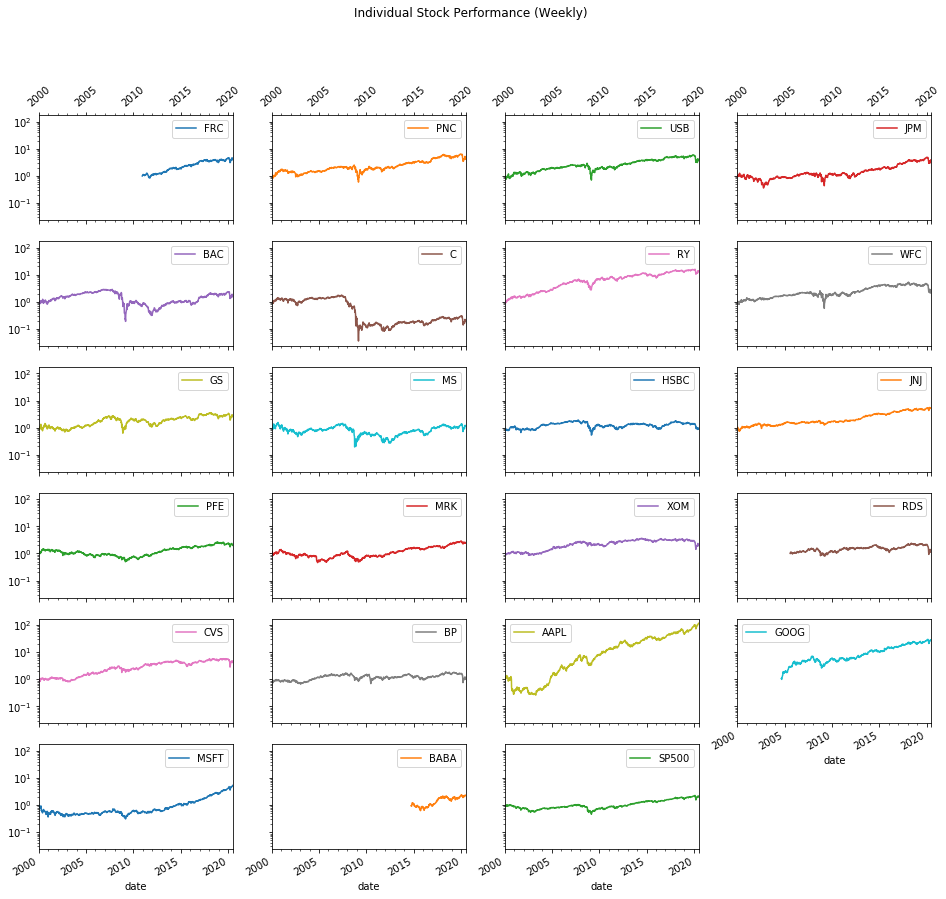

In [13]:
## Plot the individual stock performance (or cumulative return)

col = 4
row = int(np.ceil(len(Names)/col))
f_hei = row * 2.5
f_wid = col * 4
ax = (data_weekly+1).cumprod().plot(subplots=True, layout=(row, col), figsize=(f_wid, f_hei),
                                    logy=True, sharey=True, sharex=True, 
                                    title = 'Individual Stock Performance (Weekly)')
for i in range(col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)
plt.show()

## 3. Read and Edit T-Bill data

Data Source for weekly T-Bill return: https://fred.stlouisfed.org/series/WTB3MS#0

Note: the data downloaded from FRED has unit in percentage, and it is percent per annum. Moreover, although it is weekly data, it ends on every Friday, yet the weekly return data above is ending on Sunday. So we need to edit its format.

In [14]:
## Read and Edit data into the right format
file_name = 'WTB3MS.csv'
df = pd.read_csv(file_name)

df['DATE']=pd.to_datetime(df['DATE'])
df['WTB3MS'] = pd.to_numeric(df['WTB3MS'], errors='coerce')

RET_data=pd.DataFrame(columns=['RET'], index=df.DATE)
RET_data['RET'] = (df['WTB3MS'].values/100 + 1) ** (1/52) - 1 # Edit the unit of the return data

RET_data_weekly = (RET_data['RET']+1).resample('W').prod() - 1 # Convert the data to the same weekly frequency as above
TBill = pd.DataFrame(columns=['T-Bill'], index=RET_data_weekly.index)
TBill['T-Bill'] = RET_data_weekly

TBill

,T-Bill
DATE,
1954-01-10,0.000248
1954-01-17,0.000245
1954-01-24,0.000212
1954-01-31,0.000193
1954-02-07,0.000189
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


## 4. Save Data into Excel File

Check the 3 dataframes and do some final edition before saving them into one excel file.

In [15]:
## Firm Info

firms_CRSP.drop(columns = 'PERMNO', inplace = True) # Dropping the PERMNO column
firms_CRSP = firms_CRSP.set_index('Ticker') # Set Ticker as the index of the dataframe
firms_CRSP

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [16]:
## Adding S&P500 information to Firm Info 
# NOTE: one can skip this block if S&P500 is not added to the dataframe!!
df2 = pd.DataFrame({'Ticker': ['SP500'], 'Name':['S&P 500'], 'Sector':['Market Index']})
df2 = df2.set_index('Ticker')
firms_CRSP = firms_CRSP.append(df2, sort = 'False') 
firms_CRSP

,Name,Sector
Ticker,,
FRC,First Republic,Bank
PNC,PNC Financial,Bank
USB,US Bancorp,Bank
JPM,JPMorgan Chase,Bank
BAC,Bank of America,Bank
C,Citigroup,Bank
RY,Royal Bank of Canada,Bank
WFC,Wells Fargo,Bank
GS,Goldman Sachs,Bank


In [17]:
## Stock Returns Data

#Dropping the first row since it only has one day (1999-12-31) of return for the first week 
data_weekly.drop(data_weekly.index[0], inplace = True)
#Dropping the last row since it only has two days (2020-06-29,2020-06-30) of return rather than a whole-week return 
data_weekly.drop(data_weekly.index[-1], inplace = True)
data_weekly

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-09,NaN,-0.032304,-0.049869,-0.058139,-0.029888,-0.030302,-0.042493,-0.032457,-0.123426,-0.113398,...,0.115349,0.054307,NaN,0.042568,0.003161,-0.032218,NaN,-0.045503,NaN,-0.018908
2000-01-16,NaN,0.097264,0.019338,0.015465,0.034659,0.074074,-0.017752,0.065494,0.037093,0.088261,...,-0.010843,-0.013980,NaN,-0.036678,-0.070379,0.009422,NaN,0.007291,NaN,0.016428
2000-01-23,NaN,-0.061498,-0.094850,-0.012690,-0.093051,-0.026939,-0.035181,-0.121438,0.002128,-0.035047,...,-0.022765,0.014925,NaN,0.017960,0.016948,0.108278,NaN,-0.075724,NaN,-0.016237
2000-01-30,NaN,0.045583,0.005989,0.051414,0.001367,-0.005537,0.068037,0.058020,0.015318,-0.044340,...,0.054358,-0.072060,NaN,-0.067749,-0.041110,-0.087029,NaN,-0.053012,NaN,-0.056336
2000-02-06,NaN,-0.028609,0.014881,0.066015,-0.008197,-0.021727,-0.054815,0.000774,-0.026581,0.037512,...,-0.017185,0.025358,NaN,-0.048448,-0.086906,0.062731,NaN,0.084604,NaN,0.047208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417,0.038508,0.030066
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.058633,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.008699,-0.047783


In [18]:
## T-Bill Return Data

start_date = data_weekly.index[0]
end_date = data_weekly.index[-1]
TBill = TBill[TBill.index >= start_date] # To match the start date of the Stock Return data
TBill = TBill[TBill.index <= end_date]   # To match the end date of the Stock Return data
TBill

,T-Bill
DATE,
2000-01-09,0.000986
2000-01-16,0.000986
2000-01-23,0.000995
2000-01-30,0.001014
2000-02-06,0.001030
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


In [19]:
## Save data as Excel file with multiple sheets

writer = pd.ExcelWriter('CleanedData_Weekly.xlsx', engine='xlsxwriter')

firms_CRSP.to_excel(writer, sheet_name='Firms Info')
data_weekly.to_excel(writer, sheet_name='Stock Returns')
TBill.to_excel(writer, sheet_name='T-Bill')

writer.save()